In [1]:
# update sklearn
#!pip install sklearn --upgrade

In [2]:
# install joblib used to save model - restart kernel after installing 
#!pip install joblib

### Read the CSV and Perform Basic Data Cleaning

In [3]:
import pandas as pd
df = pd.read_csv("./resources/exoplanet_data.csv")
df = df.dropna(axis='columns', how='all')  # Drop the null columns where all values are null
df = df.dropna()  # Drop the null rows
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [4]:
# data features (https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)
df.dtypes

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_steff_err2         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

### Select your features (columns)

In [5]:
# Set features -- x values and targets
X = df.drop(['ra', 'dec', 'koi_disposition'], axis=1)
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 38) (6991,)


In [6]:
labels = list(y.unique())
labels

['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']

In [7]:
# Encode categories as numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

### Create a Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1)

### Pre-processing

In [9]:
# scale
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# feature selction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k=20)
X_train_scaled_selected = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled_selected = fs.fit_transform(X_test_scaled, y_test)
print(X_train_scaled_selected.shape, X_test_scaled_selected.shape)

(5243, 20) (1748, 20)


### Train the Model

In [11]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled_selected, y_train)
print(f"Training Data Score: {model.score(X_train_scaled_selected, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled_selected, y_test)}")

Training Data Score: 0.8346366584016784
Testing Data Score: 0.8192219679633868


### Hyperparameter Tuning

In [12]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [1, 5, 10, 20], 'gamma': [0.0001, 0.001, 0.01]}
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(model, param_grid, verbose=2)

In [13]:
# train the model with GridSearch
grid.fit(X_train_scaled_selected, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................................. C=10, gamma=0.1, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.1s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [14]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 100, 'gamma': 1}
0.8754511748739257


### Save the Model

In [15]:
# fit a model with 'best' parameters from grid search
model_best = SVC(kernel='linear', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
model_best.fit(X_train_scaled_selected, y_train)

SVC(C=100, gamma=1, kernel='linear')

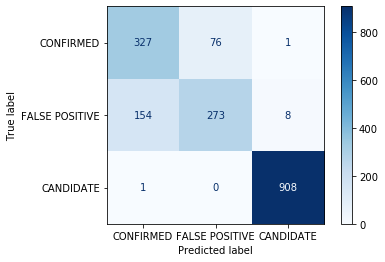

In [16]:
# confusion matrix of test data with 'best' model
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_best, X_test_scaled_selected, y_test, 
                      cmap='Blues', normalize=None, display_labels=labels);
plt.savefig('./analysis/anthony_vanderwal_svc.png')

In [17]:
# save 'best' model
import joblib
filename = './analysis/anthony_vanderwal_svc.sav'
joblib.dump(model_best, filename)

['./analysis/anthony_vanderwal_svc.sav']